loading Roboflow workspace...
loading Roboflow project...


from_roboflow is deprecated: `Detections.from_roboflow` is deprecated and will be removed in `supervision-0.21.0`. Use `Detections.from_inference` instead.


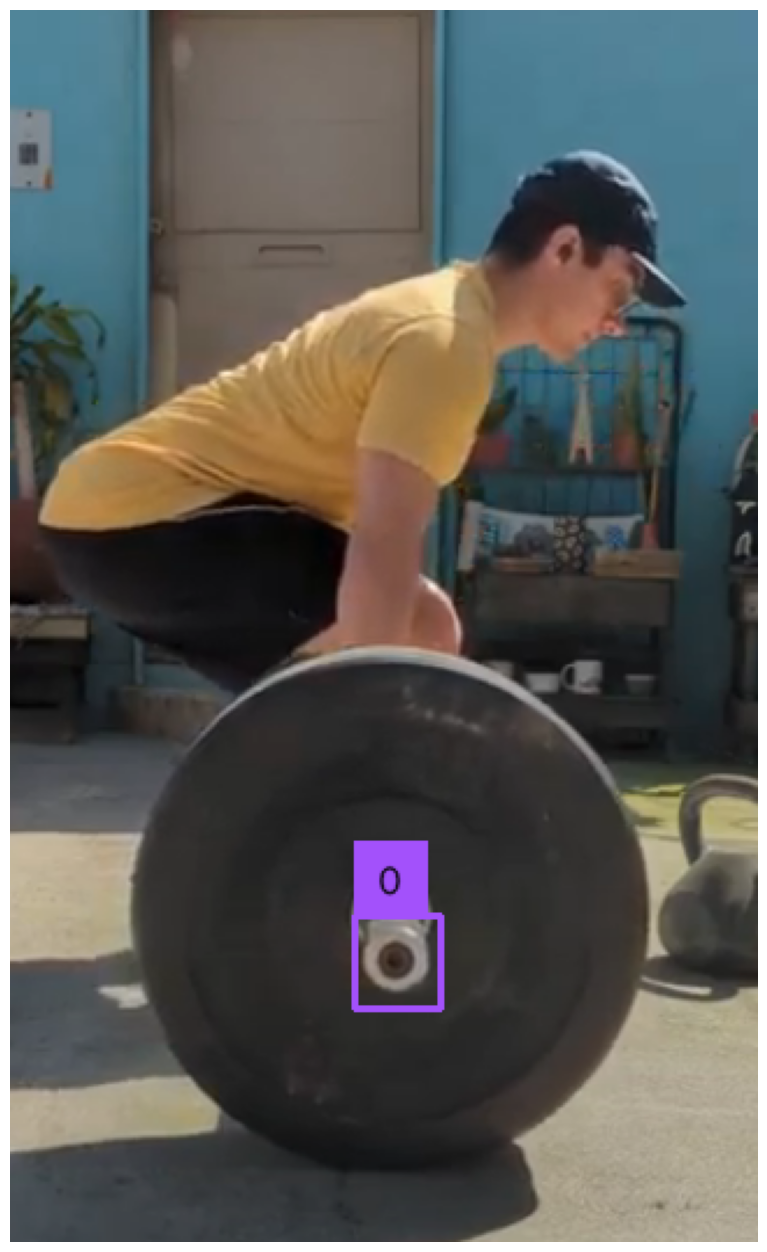

In [1]:
from roboflow import Roboflow
import supervision as sv
import cv2
import numpy as np

rf = Roboflow(api_key="5LfzIz5K5JBvcYSwepkD")
project = rf.workspace().project("barbell-detector-bncfm")
model = project.version(2).model

result = model.predict("Capture.PNG", confidence=40, overlap=30).json()

labels = [item["class"] for item in result["predictions"]]

detections = sv.Detections.from_roboflow(result)

label_annotator = sv.LabelAnnotator()
bounding_box_annotator = sv.BoxAnnotator()

image = cv2.imread("Capture.PNG")

annotated_image = bounding_box_annotator.annotate(
    scene=image, detections=detections)

# annotated_image = label_annotator.annotate(
#     scene=annotated_image, detections=detections, labels=labels)

sv.plot_image(image=annotated_image, size=(16, 16))

In [2]:
result

{'predictions': [{'x': 166.5,
   'y': 410.0,
   'width': 37.0,
   'height': 40.0,
   'confidence': 0.8946099877357483,
   'class': 'Barbell',
   'class_id': 0,
   'detection_id': '893a8329-397f-40e5-9ba3-a2c7869fdb2e',
   'image_path': 'Capture.PNG',
   'prediction_type': 'ObjectDetectionModel'}],
 'image': {'width': '322', 'height': '531'}}

In [3]:
x,y,w,h = result['predictions'][0]['x'], result['predictions'][0]['y'], result['predictions'][0]['width'], result['predictions'][0]['height']
x,y,w,h

(166.5, 410.0, 37.0, 40.0)

In [5]:
image = cv2.imread("Capture.PNG")  # Load your image
img, p1, p2 = drawBox(image, x, y, w, h)

x, y = p1
w, h = ((p2[0] - p1[0]), (p2[1] - p1[1]))
bbox = (x, y, w, h)

# sv.plot_image(image=img, size=(16, 16))

In [6]:
cv2.imshow("Inference", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [2]:
from roboflow import Roboflow
import supervision as sv
import cv2
import numpy as np

rf = Roboflow(api_key="5LfzIz5K5JBvcYSwepkD")
project = rf.workspace().project("barbell-detector-bncfm")
model = project.version(2).model

# cap = cv2.VideoCapture(1)
p1, p2 = None, None
state = 0
# tracker = cv2.legacy.TrackerMOSSE_create()


def drawBox(img, x, y, w, h):
    x1 = int(x) - int(w/2)
    y1 = int(y) - int(h/2)
    
    x2 = int(x) + int(w/2)
    y2 = int(y) + int(h/2)

    p1 = (x1, y1)
    p2 = (x2, y2)
    


    b = cv2.rectangle(img, p1, p2, (255,0,0), 2, 1)
    return b, p1, p2

def drawBox_fromtracker(img, bbox):
    p1 = (int(bbox[0]), int(bbox[1]))
    p2 = (int(bbox[0] + bbox[2]), int(bbox[1] + bbox[3]))
    cv2.rectangle(img, p1, p2, (255,0,0), 2, 1)


def img_to_rgb(image):
    """
    Convert an image to RGB format using OpenCV.

    Parameters:
        image (numpy.ndarray): Input image in BGR or grayscale format.

    Returns:
        numpy.ndarray: Image in RGB format.
    """
    # Convert the image from BGR to RGB
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    return rgb_image


video_path = r'C:\Users\COMPUBROTHER\Documents\DATA_ANALYTICS\Projects\sports-performance\bar-path-analysis\files\powerclean-185pr.mp4'

trackers = {'CSRT':cv2.legacy.TrackerCSRT_create(),
            'KCF':cv2.legacy.TrackerKCF_create(),
            'MOSSE':cv2.legacy.TrackerMOSSE_create(),
            'MedianFlow':cv2.legacy.TrackerMedianFlow_create()}


leavy = trackers['MedianFlow']

loading Roboflow workspace...
loading Roboflow project...


In [3]:
import cv2



def resize_video(input_video_path, output_video_path, width_ratio, height_ratio):
    # Open input video
    cap = cv2.VideoCapture(input_video_path)

    # Get original video properties
    original_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    original_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = int(cap.get(cv2.CAP_PROP_FPS))

    # Calculate desired width and height based on ratios
    desired_width = int(original_width * width_ratio)
    desired_height = int(original_height * height_ratio)

    # Create VideoWriter object to save resized video
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_video_path, fourcc, fps, (desired_width, desired_height))

    # Read and resize frames, then write to output video
    while True:
        ret, frame = cap.read()
        if not ret:
            break

        # Resize frame
        resized_frame = cv2.resize(frame, (desired_width, desired_height))

        # Write resized frame to output video
        out.write(resized_frame)
        
    # Release video capture and writer objects
    cap.release()
    out.release()

    # Close all OpenCV windows
    cv2.destroyAllWindows()

# Example usage:
input_video_path = video_path
output_video_path = r'C:\Users\COMPUBROTHER\Documents\DATA_ANALYTICS\Projects\sports-performance\bar-path-analysis\files/resized_video-pwrclean185pr.mp4'  # Output file in MP4 format
width_ratio = 1  # Resize width to 50% of original
height_ratio = 1  # Resize height to 50% of original

resize_video(input_video_path, output_video_path, width_ratio, height_ratio)

In [4]:
def save_frame(frame_count, fps, frame_time_seconds, frame):
    if round(frame_count % fps) < 0.1:
            # Save frame to output folder
            cv2.imwrite(f'showcase_imgs/frame_{frame_count // fps}.jpg', frame)

In [5]:
# Set the desired window size
cv2.namedWindow('Video', cv2.WINDOW_NORMAL)  # Set window to allow resizing
# cv2.resizeWindow('Video', 640, 1000)  # Set initial window size

# Check if the video opened successfully
# output_video_path = r'C:\Users\COMPUBROTHER\Documents\DATA_ANALYTICS\Projects\sports-performance\bar-path-analysis\files/resized_video-pwrclean185pr.mp4'  # Output file in MP4 format

cap = cv2.VideoCapture(video_path)
frame_count = 0

ret, frame = cap.read()

bar_path = {}

center_points = []

# Get input video properties
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)

# Define the codec and create a VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # H.264 codec

out = cv2.VideoWriter('annotated_video2.mp4', fourcc, fps, (frame_width, frame_height))


if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

if ret:
    result = model.predict(frame, confidence=40, overlap=30).json()
    x,y,w,h = result['predictions'][0]['x'], result['predictions'][0]['y'], result['predictions'][0]['width'], result['predictions'][0]['height']

    bbox = (x, y, w, h) 
    
    img, p1, p2 = drawBox(frame, x, y, w, h)

    # cv2.imshow("Video", img)
    # cv2.waitKey(0)
    
    x, y = p1
    w, h = ((p2[0] - p1[0]), (p2[1] - p1[1]))

    bbox = (x, y, w, h) #new value

    # if result:

while cap.isOpened():
    success, img = cap.read()

    # frame_time_seconds = cap.get(cv2.CAP_PROP_POS_MSEC) / 1000

    frame_time_seconds = frame_count/fps #frames to seconds

    ret, bbox = leavy.update(img)

    x = int(bbox[0] + (bbox[2] // 2))
    y = int(bbox[1] + (bbox[3] // 2))


    center_point = (x, y)

    bar_path[round(frame_time_seconds, 2)] = center_point

    center_points.append(center_point)

    # print(center_points)

    if ret:
        # drawBox_fromtracker(img, bbox)
        # print(center_point)

        cv2.circle(img, (x, y), 5, (0, 0, 255), -1)  # Draw a red circle
        if len(center_points) > 1:
            for i in range(5, len(center_points)):
                pt1 = center_points[i - 1]
                pt2 = center_points[i]
                pt1 = (int(pt1[0]), int(pt1[1]))
                pt2 = (int(pt2[0]), int(pt2[1]))
                cv2.line(img, pt1, pt2, (0, 0, 255), 2)
        
    if success:
        x, y = p1
        w, h = ((p2[0] - p1[0]), (p2[1] - p1[1]))
        bbox = (x, y, w, h)
        
        #cv2.rectangle(img, p1, p2, (255,0,0), 2, 1)  
        leavy.init(img,bbox)


        cv2.imshow("Video", img)
        out.write(img)
        save_frame(frame_count, fps, frame_time_seconds, img)

    # Exit loop if 'q' is pressed
        if cv2.waitKey(25) & 0xFF == ord('q'):
            cap.release()
            cv2.destroyAllWindows()
            break

    else:
        cap.release()
        cv2.destroyAllWindows()
        break

    frame_count+=1

cap.release()
cv2.destroyAllWindows()


In [22]:
import pandas as pd
df_bar_path = pd.DataFrame(bar_path).T

In [23]:
df_bar_path = df_bar_path.rename_axis('time').reset_index()

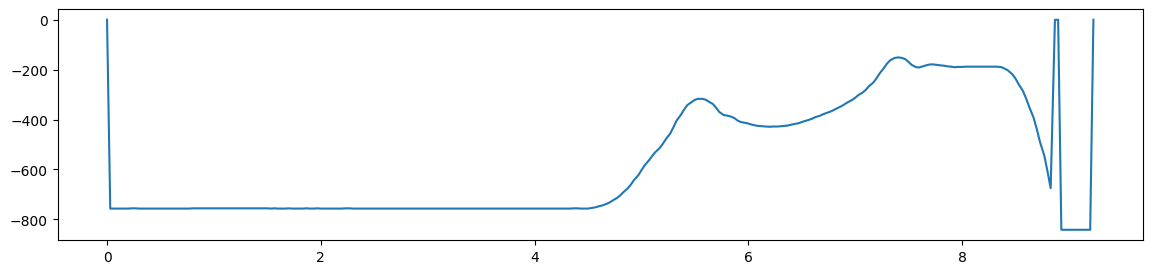

In [46]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 1, figsize = (14, 3))

x = df_bar_path['time']
y = df_bar_path[1]

plt.plot(x, -y)

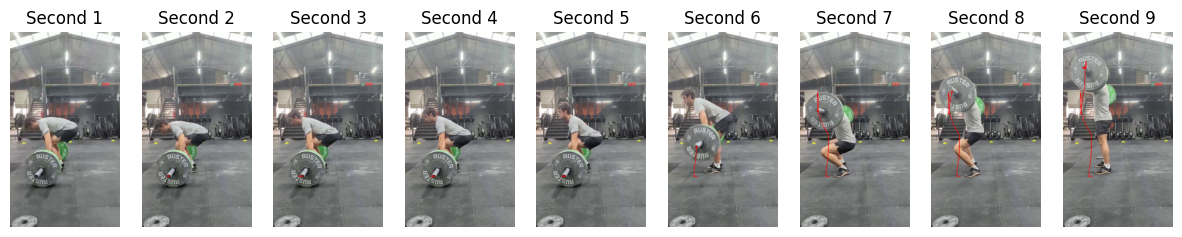

In [29]:
import os 
from matplotlib.image import imread
import matplotlib.pyplot as plt

img_folder = "showcase_imgs"
img_files = os.listdir("showcase_imgs")

fig, axes = plt.subplots(1, len(img_files), figsize = (15, 5))

# Plot each image in the timeline
for i, image_file in enumerate(img_files):
    # Load and plot image
    image_path = os.path.join(img_folder, image_file)
    image = imread(image_path)
    axes[i].imshow(image)
    axes[i].axis('off')
    axes[i].set_title(f'Second {i + 1}')


The figure layout has changed to tight


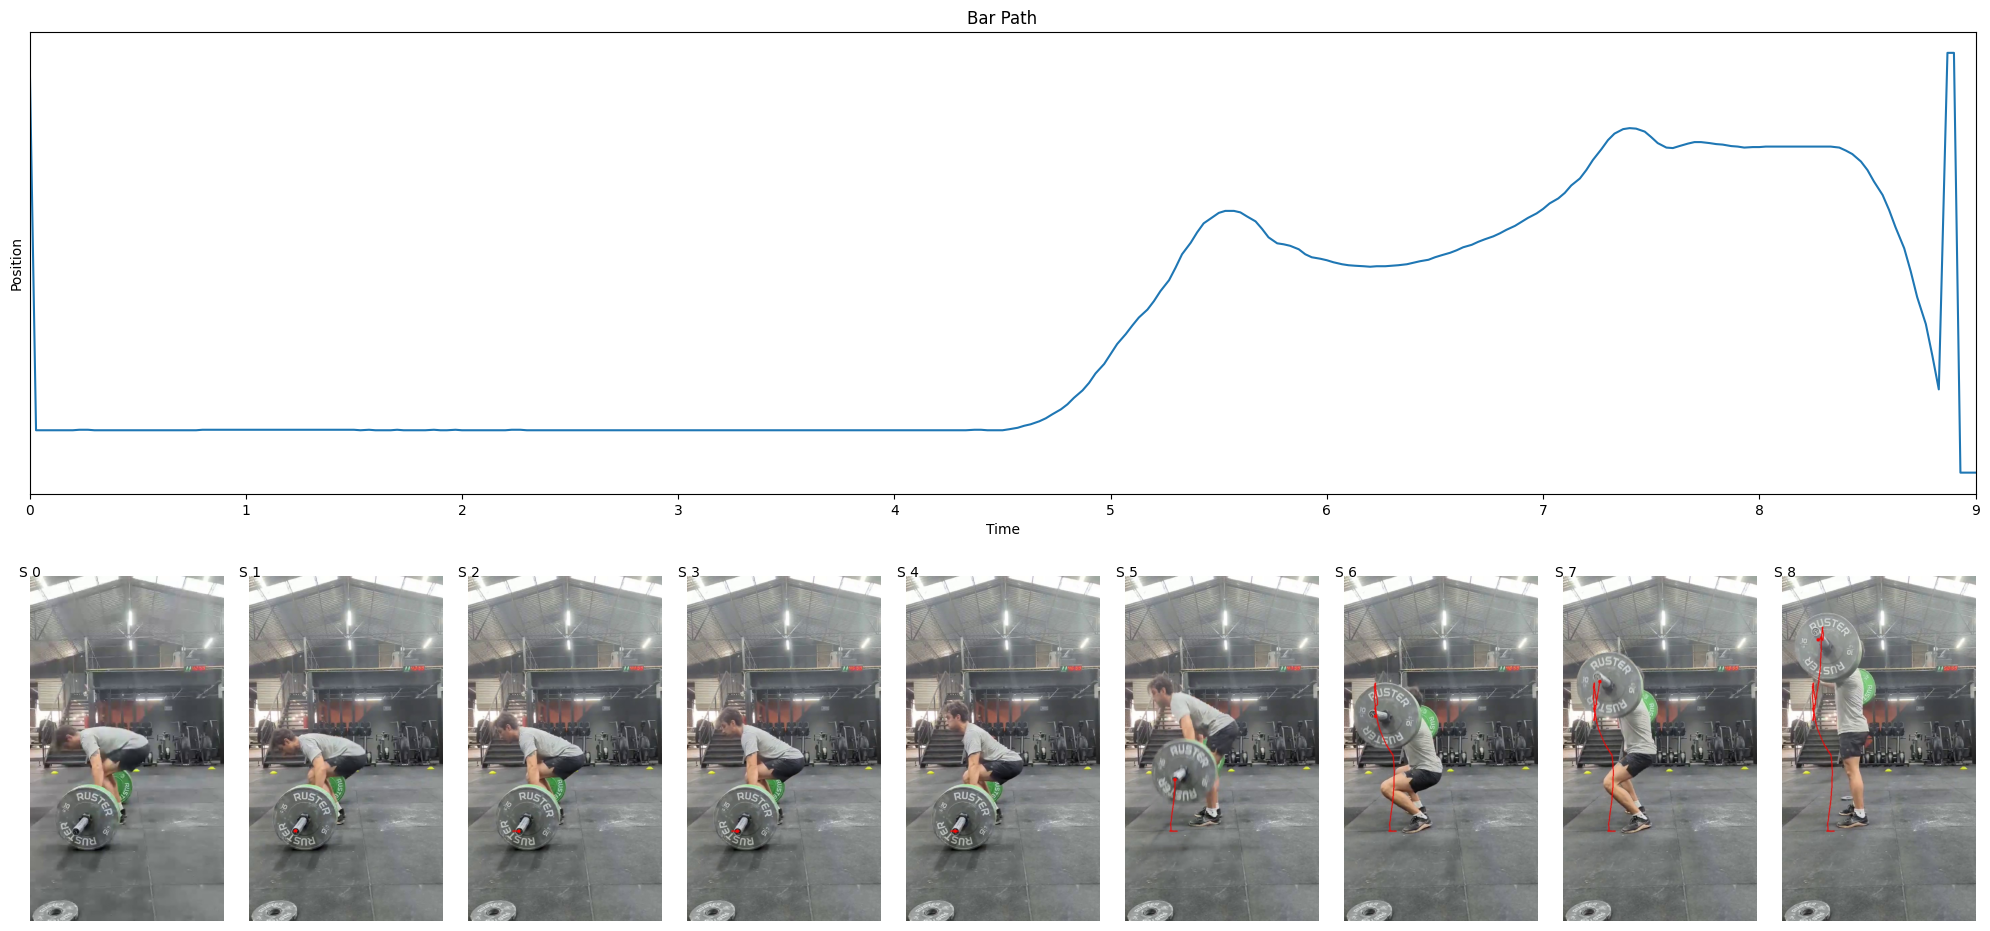

In [76]:
import os
import matplotlib.pyplot as plt
from matplotlib.image import imread
from matplotlib.gridspec import GridSpec

img_folder = "showcase_imgs"
img_files = os.listdir("showcase_imgs")

# Plot bar path data
fig = plt.figure(layout="constrained", figsize = (20, 10))

gs = GridSpec(2, len(img_files), figure=fig)

ax1 = fig.add_subplot(gs[0, :])
ax1.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)
ax1.set_xlim(0, 9)
# identical to ax1 = plt.subplot(gs.new_subplotspec((0, 0), colspan=3))

for i, image_file in enumerate(img_files, 2):
    ax = fig.add_subplot(gs[1, i-2])
    # Load and plot image
    image_path = os.path.join(img_folder, image_file)
    image = imread(image_path)
    ax.imshow(image)
    ax.axis('off')
    # ax.set_title('Images')
    ax.text(i, 0, f'S {i-2}', ha='center', fontsize=10)  # Add text for each image


# Plot bar path
x = df_bar_path['time']
y = df_bar_path[1]

ax1.plot(x, -y)
ax1.set_title('Bar Path')
ax1.set_xlabel('Time')
ax1.set_ylabel('Position')

# Plot images
img_folder = "showcase_imgs"
img_files = os.listdir("showcase_imgs")

# # Plot each image in the bottom row
# for i, image_file in enumerate(img_files):
#     # Load and plot image
#     image_path = os.path.join(img_folder, image_file)
#     image = imread(image_path)
#     axes[1,i].imshow(image)
#     axes[1,i].axis('off')
#     axes[1,i].set_title('Images')
#     axes[1,i].text(i, 0, f'Second {i + 1}', ha='center', fontsize=8)  # Add text for each image


plt.tight_layout()
plt.show()